In [8]:
import pandas as pd

tickers = ["Nifty", "DowJones","Nasdaq", "HangSeng", "Nikkei","DAX", "VIX"]

markets = pd.read_csv("markets.csv")
markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2312 non-null   object 
 1   Nifty_Open      2312 non-null   float64
 2   Nifty_Close     2312 non-null   float64
 3   DowJones_Open   2312 non-null   float64
 4   DowJones_Close  2312 non-null   float64
 5   Nasdaq_Open     2312 non-null   float64
 6   Nasdaq_Close    2312 non-null   float64
 7   HangSeng_Open   2312 non-null   float64
 8   HangSeng_Close  2312 non-null   float64
 9   Nikkei_Open     2312 non-null   float64
 10  Nikkei_Close    2312 non-null   float64
 11  DAX_Open        2312 non-null   float64
 12  DAX_Close       2312 non-null   float64
 13  VIX_Open        2312 non-null   float64
 14  VIX_Close       2312 non-null   float64
dtypes: float64(14), object(1)
memory usage: 271.1+ KB


In [ ]:
# Calculate the daily return based on the closing price
for ticker in tickers:
    # calculate for all except VIX
    if ticker != "VIX":
        markets[f"{ticker}_Return"] = (markets[f"{ticker}_Close"] - markets[f"{ticker}_Open"]) / markets[f"{ticker}_Open"] * 100

markets.head()

In [13]:
# Check for normality of the returns
from scipy.stats import shapiro


# SJapiro-Wilk test for normality
for ticker in tickers:
    if ticker != "VIX":    
        stat, p = shapiro(markets[f"{ticker}_Return"])
        print(f"Shapiro-Wilk Test for {ticker}_Return: Statistics={stat}, p-value={p}")
        if p > 0.05:
            print(f"{ticker}_Return follows a normal distribution (fail to reject H0)")
        else:
            print(f"{ticker}_Return does not follow a normal distribution (reject H0)")


# Lilliefors test for normality
from statsmodels.stats.diagnostic import lilliefors

for ticker in tickers:
    if ticker != "VIX":
        stat, p = lilliefors(markets[f"{ticker}_Return"])
        print(f"Lilliefors Test for {ticker}_Return: Statistics={stat}, p-value={p}")
        if p > 0.05:
            print(f"{ticker}_Return follows a normal distribution (fail to reject H0)")
        else:
            print(f"{ticker}_Return does not follow a normal distribution (reject H0)")	
        
# Normality tests results returned by both Shapiro-Wilk and Lilliefors 
# tests indicate whether the returns of each market index follow a normal distribution or not.
# Nevertheless, we will use a qq plot to visually assess the normality of the returns.

Shapiro-Wilk Test for Nifty_Return: Statistics=0.8880823051306622, p-value=5.084355786769781e-38
Nifty_Return does not follow a normal distribution (reject H0)
Shapiro-Wilk Test for DowJones_Return: Statistics=0.9101363440274829, p-value=6.107023512089685e-35
DowJones_Return does not follow a normal distribution (reject H0)
Shapiro-Wilk Test for Nasdaq_Return: Statistics=0.940396673682592, p-value=1.5212223120124294e-29
Nasdaq_Return does not follow a normal distribution (reject H0)
Shapiro-Wilk Test for HangSeng_Return: Statistics=0.9619305773702889, p-value=3.402137547460258e-24
HangSeng_Return does not follow a normal distribution (reject H0)
Shapiro-Wilk Test for Nikkei_Return: Statistics=0.8542049728936724, p-value=6.531564461454799e-42
Nikkei_Return does not follow a normal distribution (reject H0)
Shapiro-Wilk Test for DAX_Return: Statistics=0.9345908823699851, p-value=1.0049730686119735e-30
DAX_Return does not follow a normal distribution (reject H0)
Lilliefors Test for Nifty_R

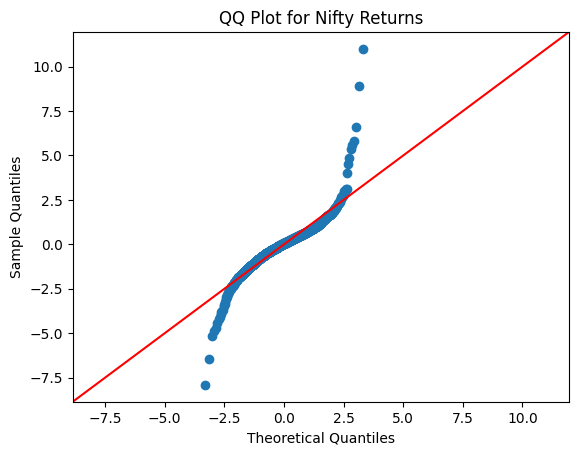

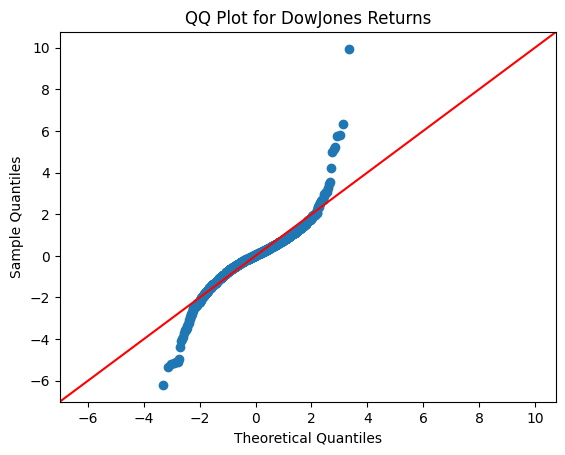

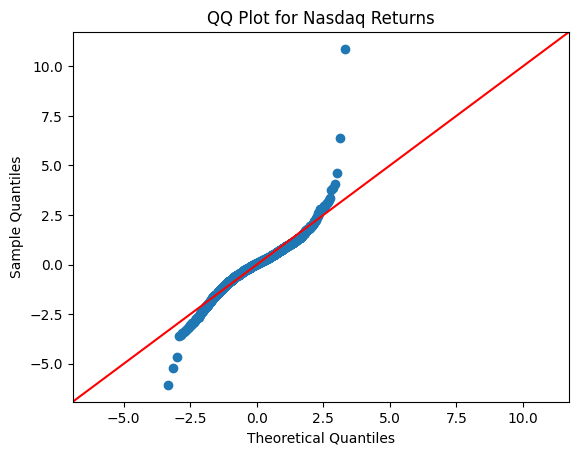

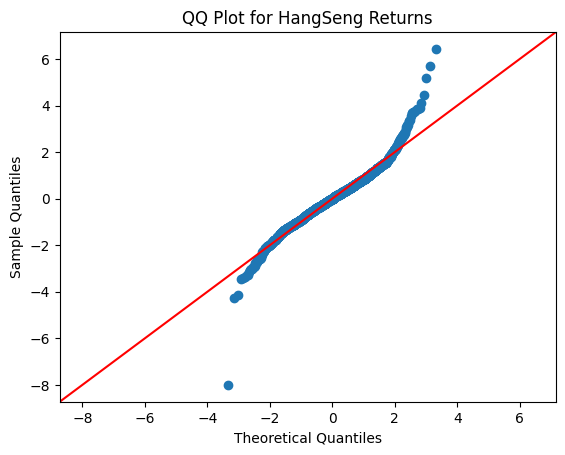

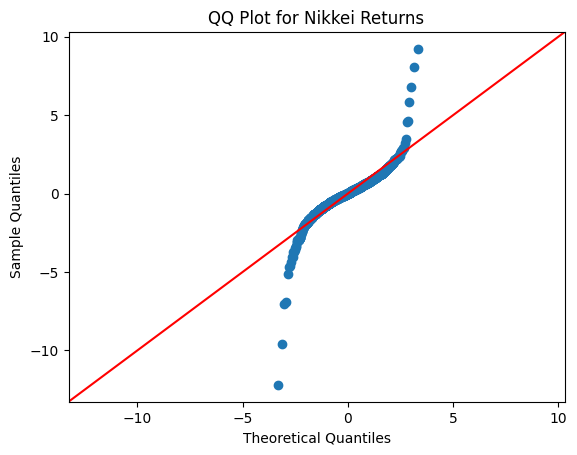

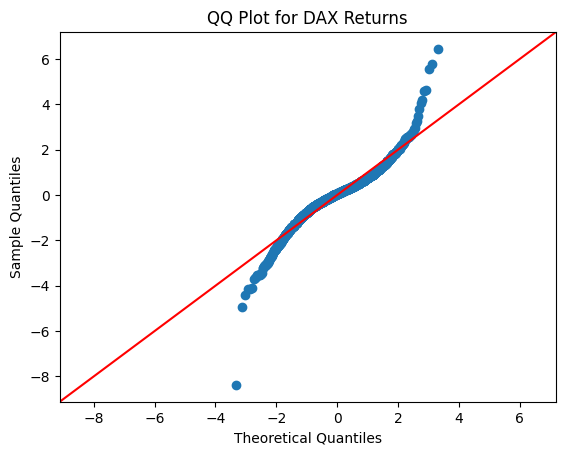

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

for ticker in tickers:
    if ticker != "VIX":
        sm.graphics.qqplot(markets[f"{ticker}_Return"], line='45', fit=True)
        plt.title(f"QQ Plot for {ticker} Returns")
        plt.show()

In [16]:
markets["Quarter"] = pd.to_datetime(markets["Date"]).dt.quarter
markets["Month"] = pd.to_datetime(markets["Date"]).dt.month
markets["Year"] = pd.to_datetime(markets["Date"]).dt.year
markets["dayofweek"] = pd.to_datetime(markets["Date"]).dt.dayofweek
markets["day"] = pd.to_datetime(markets["Date"]).dt.day

# Remove weekends from the dataset
markets = markets[markets.dayofweek < 5]
# Remove the first of Jan of each year
markets = markets[~((markets["Month"] == 1) & (markets["day"] == 1))]

markets.drop(columns=["dayofweek", "day"], inplace=True)
markets.reset_index(inplace=True, drop=True, names="Date")

print(markets.info())
#print(markets.tail())

markets.to_csv("markets_with_returns.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1647 non-null   object 
 1   Nifty_Open       1647 non-null   float64
 2   Nifty_Close      1647 non-null   float64
 3   DowJones_Open    1647 non-null   float64
 4   DowJones_Close   1647 non-null   float64
 5   Nasdaq_Open      1647 non-null   float64
 6   Nasdaq_Close     1647 non-null   float64
 7   HangSeng_Open    1647 non-null   float64
 8   HangSeng_Close   1647 non-null   float64
 9   Nikkei_Open      1647 non-null   float64
 10  Nikkei_Close     1647 non-null   float64
 11  DAX_Open         1647 non-null   float64
 12  DAX_Close        1647 non-null   float64
 13  VIX_Open         1647 non-null   float64
 14  VIX_Close        1647 non-null   float64
 15  Nifty_Return     1647 non-null   float64
 16  DowJones_Return  1647 non-null   float64
 17  Nasdaq_Return 